# Rt Live Model

In [1]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import pandas as pd
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from covid.models.generative import GenerativeModel
from covid.data import summarize_inference_data
%config InlineBackend.figure_format = 'retina'

from covid.data import get_and_process_covidtracking_data_il, get_and_process_covidtracking_data_il_other, get_and_process_covidtracking_data_il_contact, summarize_inference_data

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


## Fetch data and select the state's data

In [2]:
df = get_and_process_covidtracking_data_il(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_other = get_and_process_covidtracking_data_il_other(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))
df_contact = get_and_process_covidtracking_data_il_contact(run_date=pd.Timestamp.today()-pd.Timedelta(days=1))


In [3]:
region = "Israel"
model_data = df.loc[region]
model_data_other = df_other.loc[region]
model_data_contact = df_contact.loc[region]

## Create the model instance and sample

In [4]:
gm = GenerativeModel(region, model_data)
gm.sample()
gm_other = GenerativeModel(region, model_data_other)
gm_other.sample()
gm_contact = GenerativeModel(region, model_data_contact)
gm_contact.sample()

Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 1669 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 1754 seconds.
Only 200 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, seed, log_r_t]


Sampling 4 chains for 700 tune and 200 draw iterations (2_800 + 800 draws total) took 1702 seconds.


## Summarize Model Output

In [5]:
result = summarize_inference_data(gm.inference_data)
result_other = summarize_inference_data(gm_other.inference_data)
result_contact = summarize_inference_data(gm_contact.inference_data)

In [6]:
result.tail(21)

result_contact.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-07,1.017773,1.012611,0.913188,1.099224,398.432400,435.931019,426.181305,457,508
2020-08-08,1.018983,1.017436,0.924021,1.114861,399.679779,436.685874,436.341334,140,152
2020-08-09,1.020448,1.018370,0.915024,1.124766,400.965177,437.486391,433.582854,637,696
2020-08-10,1.022539,1.017309,0.911890,1.130440,402.397203,438.340958,419.015696,758,857
2020-08-11,1.024350,1.018048,0.899108,1.130990,404.004121,439.257235,439.765935,686,739
2020-08-12,1.025605,1.018974,0.895434,1.147670,405.823506,440.241863,424.807590,599,668
2020-08-13,1.023746,1.017654,0.879153,1.140498,407.872107,441.295944,426.080701,742,825
2020-08-14,1.023662,1.013972,0.891883,1.157769,410.116471,442.411452,421.728801,300,337
2020-08-15,1.023559,1.016568,0.897396,1.175906,412.439335,443.582122,443.699843,192,205


## Plot Model Output

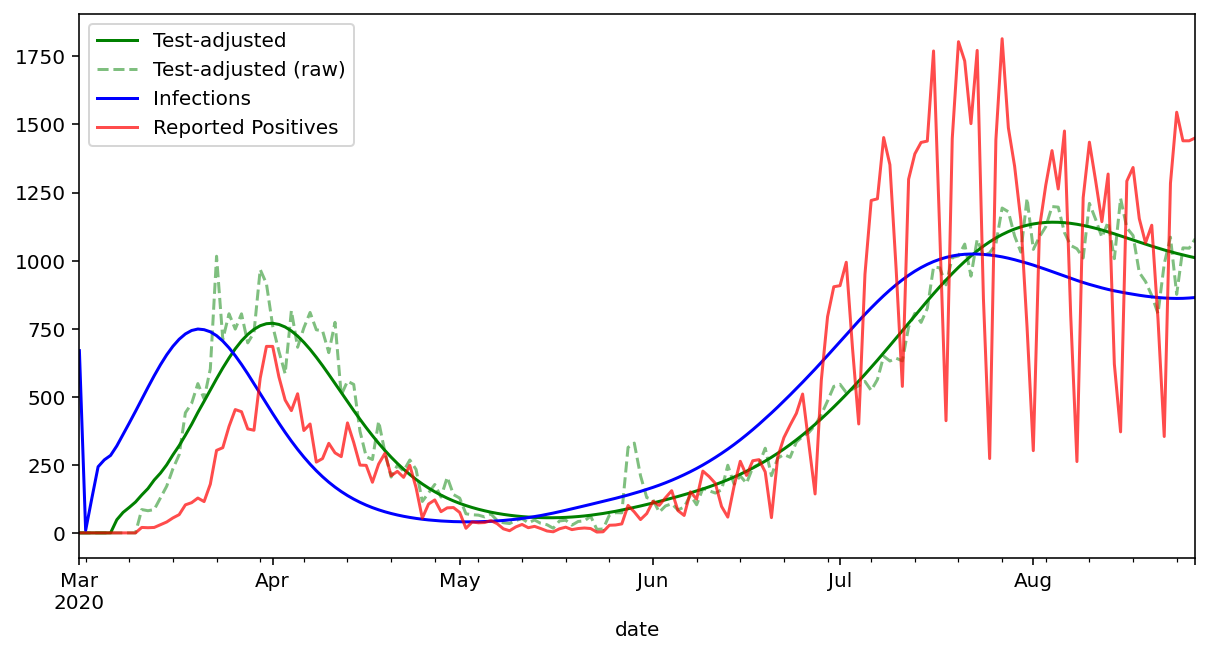

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
result.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result.infections.plot(c="b", label="Infections")
gm.observed.positive.plot(c='r', alpha=.7, label="Reported Positives")
fig.set_facecolor('w')
ax.legend();

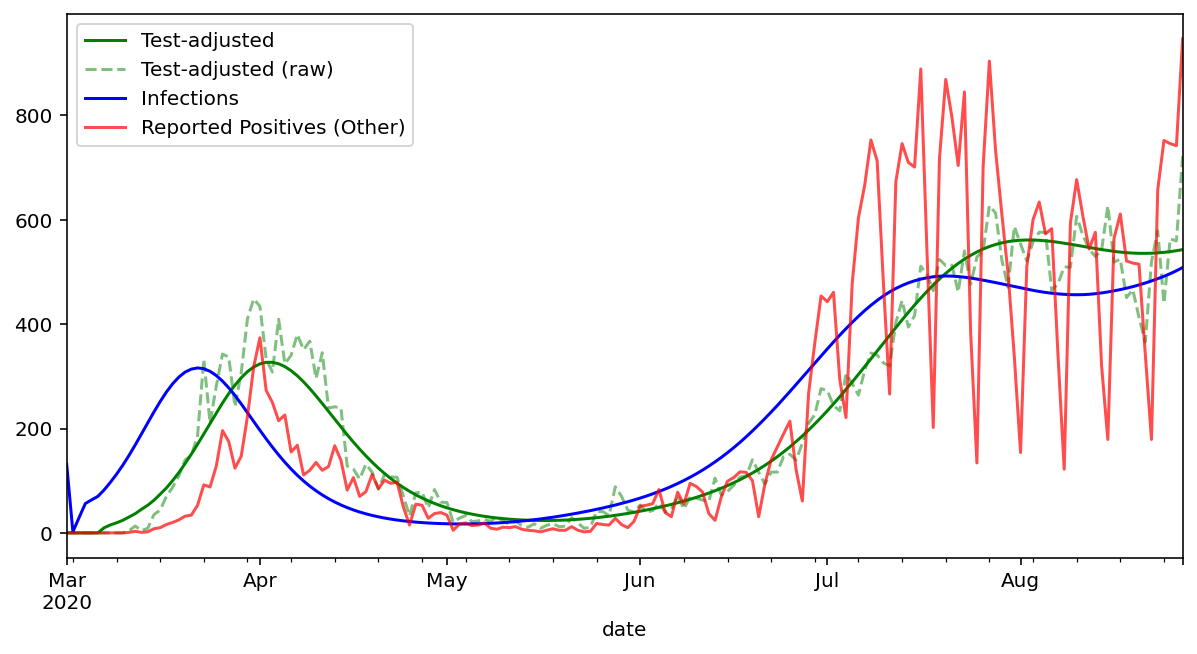

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
result_other.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_other.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_other.infections.plot(c="b", label="Infections")
gm_other.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (Other)")
fig.set_facecolor('w')
ax.legend();

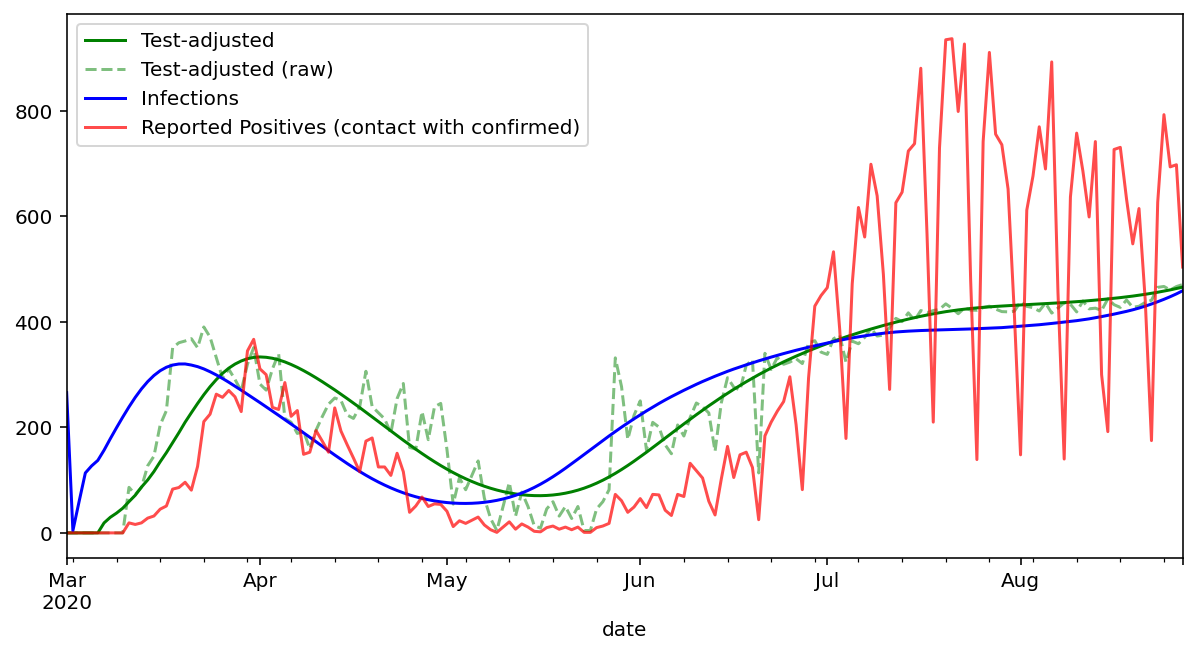

In [9]:
fig, ax = plt.subplots(figsize=(10,5))
result_contact.test_adjusted_positive.plot(c="g", label="Test-adjusted")
result_contact.test_adjusted_positive_raw.plot(c="g", alpha=.5, label="Test-adjusted (raw)", style="--")
result_contact.infections.plot(c="b", label="Infections")
gm_contact.observed.positive.plot(c='r', alpha=.7, label="Reported Positives (contact with confirmed)")
fig.set_facecolor('w')
ax.legend();

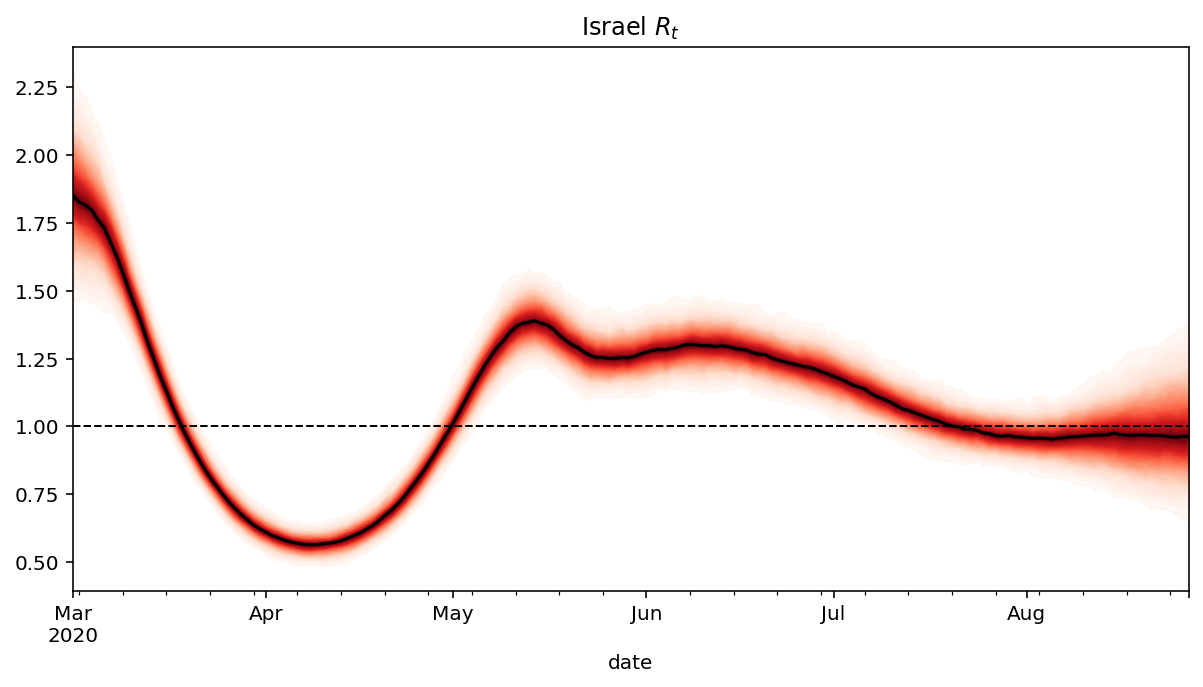

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$")
samples = gm.trace['r_t']
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

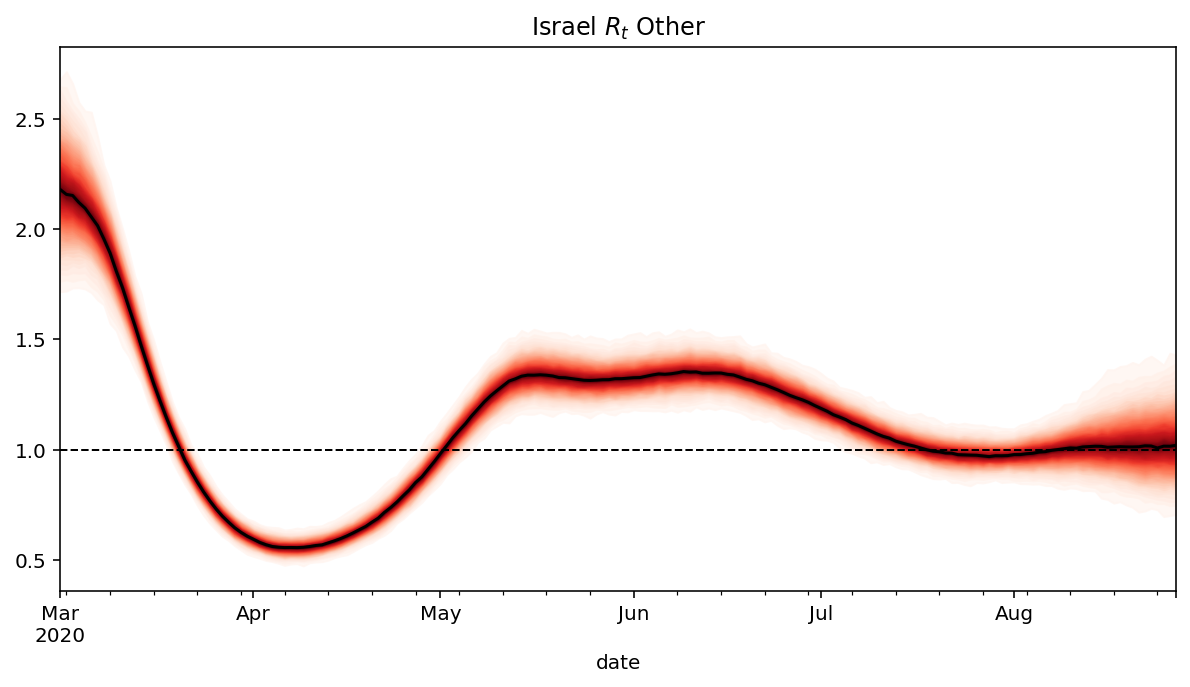

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ Other")
samples = gm_other.trace['r_t']
x=result_other.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_other["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

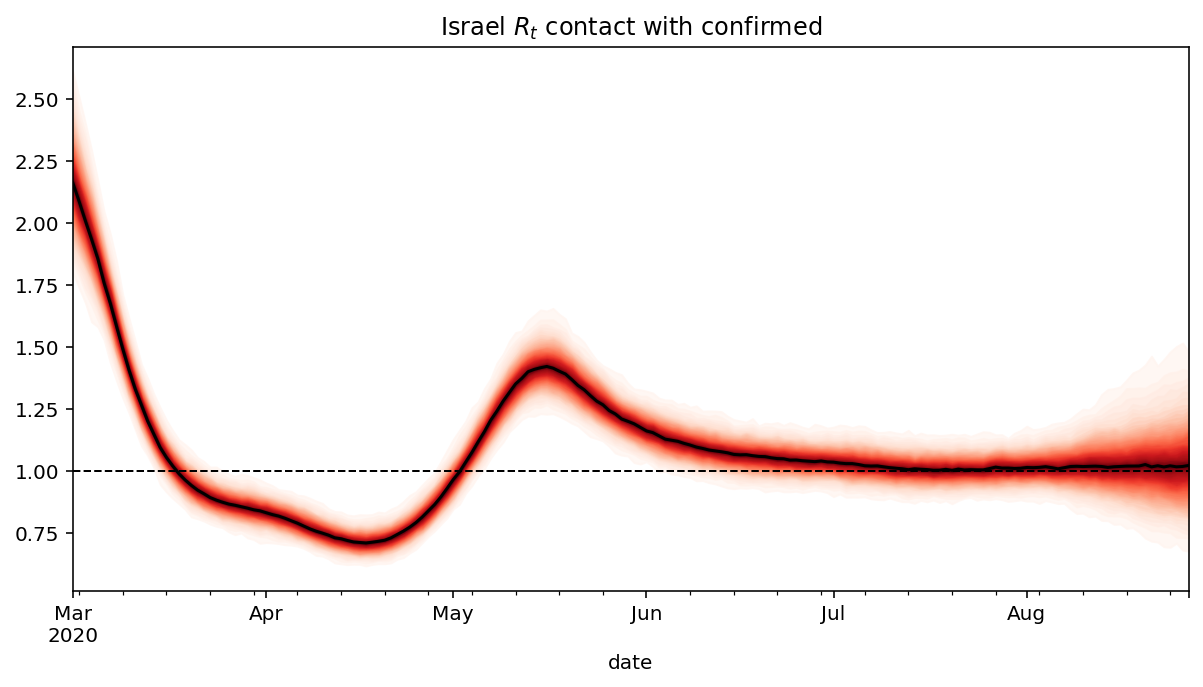

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ contact with confirmed")
samples = gm_contact.trace['r_t']
x=result_contact.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))
samples = samples.T

result_contact["median"].plot(c="k", ls='-')

for i, p in enumerate(percs[::-1]):
    upper = np.percentile(samples, p, axis=1)
    lower = np.percentile(samples, 100-p, axis=1)
    color_val = colors[i]
    ax.fill_between(x, upper, lower, color=cmap(color_val), alpha=.8)

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')

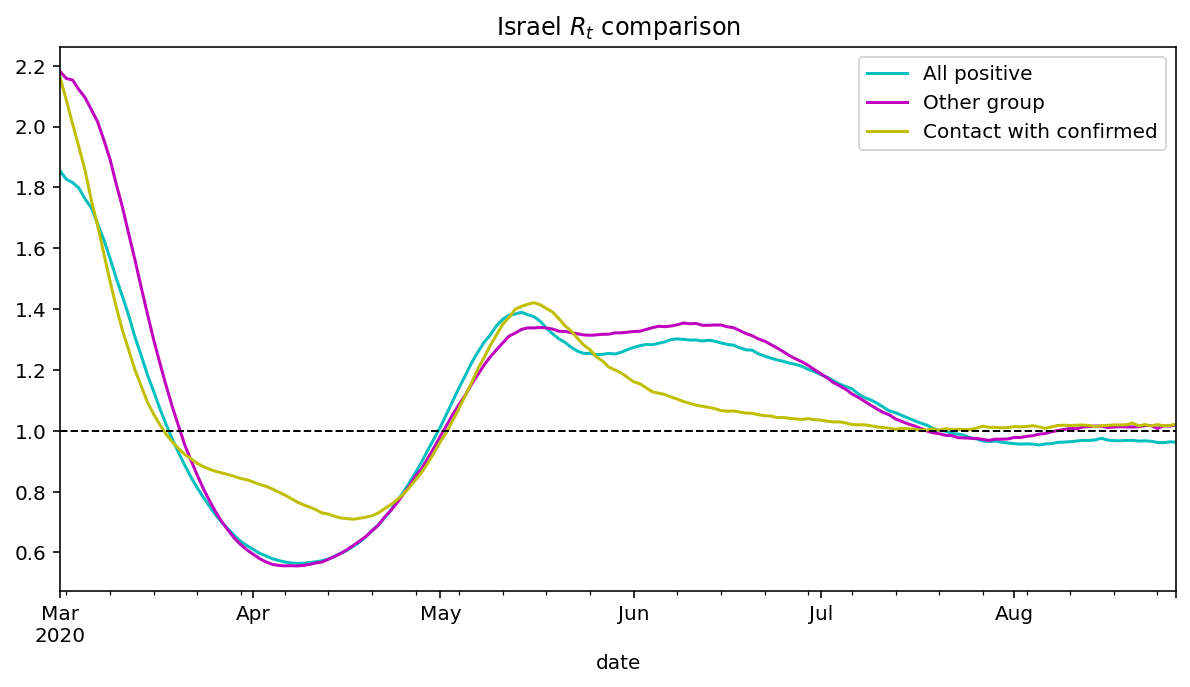

In [13]:
fig, ax = plt.subplots(figsize=(10,5))

ax.set_title(f"{region} $R_t$ comparison")
x=result.index
cmap = plt.get_cmap("Reds")
percs = np.linspace(51, 99, 40)
colors = (percs - np.min(percs)) / (np.max(percs) - np.min(percs))

result["median"].plot(c="c", ls='-', label="All positive")
result_other["median"].plot(c="m", ls='-', label="Other group")
result_contact["median"].plot(c="y", ls='-', label="Contact with confirmed")

ax.axhline(1.0, c="k", lw=1, linestyle="--")
fig.set_facecolor('w')
ax.legend()

In [14]:
result_other.tail(21)

,mean,median,lower_80,upper_80,infections,test_adjusted_positive,test_adjusted_positive_raw,positive,tests
date,,,,,,,,,
2020-08-07,0.996287,0.996842,0.888321,1.068895,458.045832,556.947046,477.350913,342,6906
2020-08-08,0.998775,1.000543,0.892556,1.085859,457.122710,555.173734,509.742050,122,2307
2020-08-09,1.004553,1.004477,0.908851,1.109374,456.563964,553.225977,509.082274,594,11247
2020-08-10,1.008533,1.007966,0.904131,1.114344,456.353400,551.159910,606.646541,677,10757
2020-08-11,1.012400,1.006586,0.908431,1.124085,456.556164,549.035428,570.213150,607,10261
2020-08-12,1.015747,1.012356,0.880774,1.121752,457.233305,546.912726,543.725778,544,9644
2020-08-13,1.018308,1.013937,0.886692,1.133692,458.341382,544.846521,529.683633,576,10482
2020-08-14,1.019318,1.015628,0.870370,1.134002,459.850775,542.886010,541.810004,320,5693
2020-08-15,1.021413,1.015236,0.849529,1.126957,461.715992,541.077848,626.736582,179,2753
